 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [143]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_pd = pd.read_csv(whale_returns_csv, index_col="Date")


# YOUR CODE HERE
whale_pd = pd.read_csv(whale_returns_csv,index_col="Date", parse_dates=True)
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [144]:
# Count nulls
whale_pd.shape
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [145]:
# Drop nulls
#csv_data = csv_data.fillna("Unknown")
whale_pd.dropna(inplace=True)
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [146]:
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [147]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_pd = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True)
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [148]:
# Count nulls
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [149]:
# Drop nulls
algo_pd.dropna()
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [150]:
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [151]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_pd = pd.read_csv(sp500_history_csv,index_col="Date", parse_dates=True)
sp500_pd.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [152]:
# Check Data Types
sp500_pd.dtypes
#sp500_pd.head()

Close    object
dtype: object

In [153]:
# Fix Data Types
sp500_pd["Close"] = sp500_pd["Close"].str.replace('$','')
sp500_pd.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [154]:
sp500_pd["Close"] = sp500_pd["Close"].astype('float64')
sp500_pd.info()
sp500_pd["Close"] = sp500_pd["Close"].pct_change()
sp500_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [155]:
# Calculate Daily Returns 

sp500_pd = sp500_pd.astype('float64')
sp500_pd.info()
sp500_pd = sp500_pd.pct_change()
sp500_pd.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


,Close
Date,
2019-04-23,NaN
2019-04-22,NaN
2019-04-18,-0.884637
2019-04-17,0.559400
2019-04-16,-2.445510


In [156]:
# Drop nulls
# YOUR CODE HERE
sp500_pd.dropna(inplace=True)
sp500_pd.isnull().sum()

Close    0
dtype: int64

In [157]:
# Rename Column
# YOUR CODE HERE
sp500_pd.columns = ["S&P 500"]
sp500_pd.head()

,S&P 500
Date,
2019-04-18,-0.884637
2019-04-17,0.559400
2019-04-16,-2.445510
2019-04-15,-1.223394
2019-04-12,-2.237116


## Combine Whale, Algorithmic, and S&P 500 Returns

In [158]:
# Concatenate all DataFrames into a single DataFrame
all_returns = pd.concat([whale_pd,sp500_pd,algo_pd], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-4.689667,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-1.083090,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,-4.659421,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-1.227713,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,7.980195,-0.005447,0.001303


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

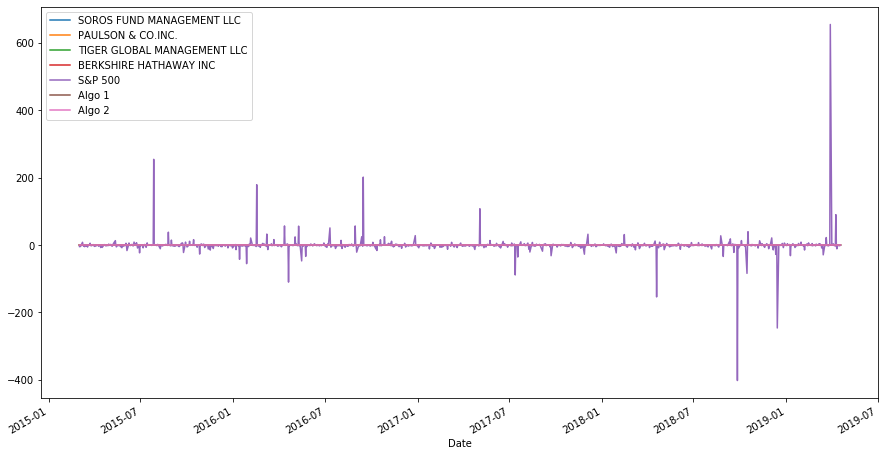

In [159]:
# Plot daily returns
# YOUR CODE HERE
all_returns.plot(figsize=(15,8))

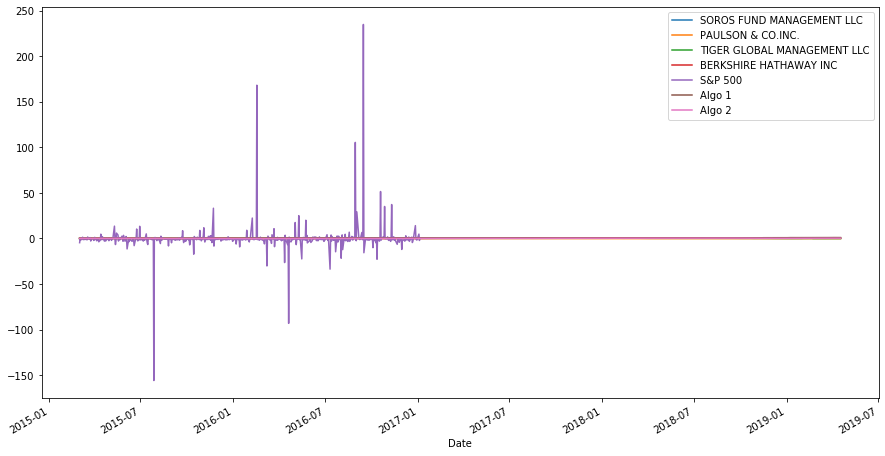

In [160]:
# Plot cumulative returns
cumulative_returns = (1+all_returns).cumprod() -1
cumulative_returns.plot(figsize=(15,8))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

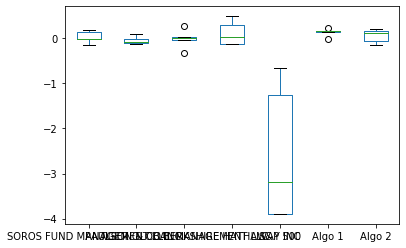

In [166]:
# Box plot to visually show risk
cum_returns_by_year = all_returns.groupby(all_returns.index.year).apply(lambda x: (1+x).cumprod() -1)
annual_returns_by_year = cum_returns_by_year.groupby(cum_returns_by_year.index.year).last()
annual_returns_by_year.plot.box()

In [172]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = all_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007900
PAULSON & CO.INC.              0.007025
TIGER GLOBAL MANAGEMENT LLC    0.010902
BERKSHIRE HATHAWAY INC         0.012925
S&P 500                             NaN
Algo 1                         0.007626
Algo 2                         0.008345
dtype: float64


In [175]:
# Determine which portfolios are riskier than the S&P 500
riskier = daily_std[daily_std > daily_std["S&P 500"]]
print(riskier)

Series([], dtype: float64)


In [176]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125401
PAULSON & CO.INC.              0.111525
TIGER GLOBAL MANAGEMENT LLC    0.173064
BERKSHIRE HATHAWAY INC         0.205176
S&P 500                             NaN
Algo 1                         0.121065
Algo 2                         0.132472
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

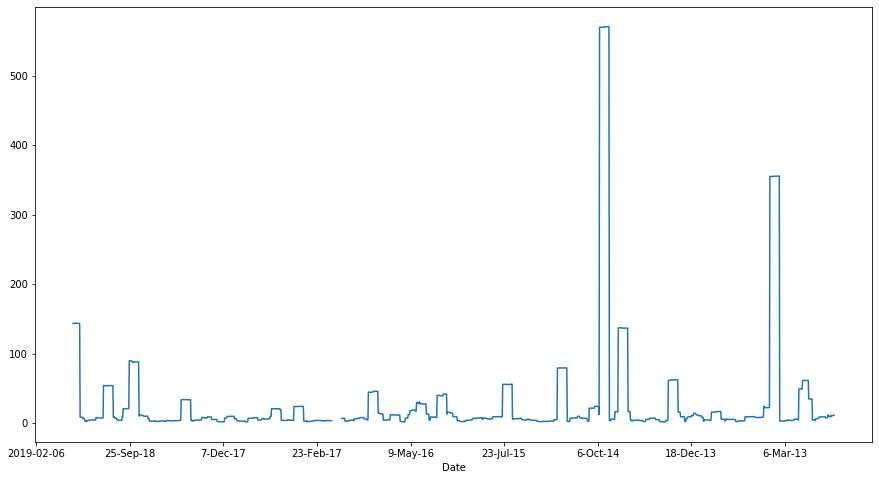

In [78]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
all_returns["S&P 500"].rolling(window=21).std().plot(figsize=(15,8))

In [56]:
# Construct a correlation table
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699869,0.560992,0.754166,0.048078,0.320920,0.826717
PAULSON & CO.INC.,0.699869,1.000000,0.434227,0.545605,0.047996,0.268766,0.678186
TIGER GLOBAL MANAGEMENT LLC,0.560992,0.434227,1.000000,0.424111,0.060394,0.164124,0.507121
BERKSHIRE HATHAWAY INC,0.754166,0.545605,0.424111,1.000000,0.035994,0.291681,0.687752
S&P 500,0.048078,0.047996,0.060394,0.035994,1.000000,0.033237,0.048798
Algo 1,0.320920,0.268766,0.164124,0.291681,0.033237,1.000000,0.287862
Algo 2,0.826717,0.678186,0.507121,0.687752,0.048798,0.287862,1.000000


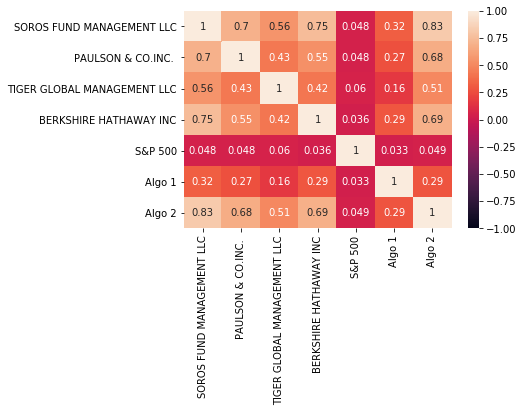

In [177]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
import seaborn as sns
correlation = all_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)
correlation

In [180]:
# Calculate a rolling window using the exponentially weighted moving average. 
covariance = all_returns['BERKSHIRE HATHAWAY INC'].cov(all_returns['S&P 500'])
variance = all_returns['S&P 500'].var()
algo1_beta = covariance / variance
algo1_beta

nan

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [81]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
SOROS FUND MANAGEMENT LLC      0.361568
BERKSHIRE HATHAWAY INC         0.619628
Algo 2                         0.639258
Algo 1                         1.300176
S&P 500                             NaN
dtype: float64

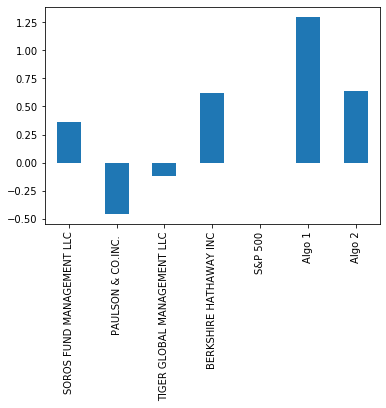

In [82]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [61]:
# Read the first stock
# YOUR CODE HERE

In [62]:
# Read the second stock
# YOUR CODE HERE

In [63]:
# Read the third stock
# YOUR CODE HERE

In [83]:
# Concatenate all stocks into a single DataFrame
tickers = ['aapl','cost','goog']
combined_df = None
for ticker in tickers:
    TICKER = ticker.upper()
    ticker_returns_csv = Path(f"./Resources/{ticker}_historical.csv")
    ticker_df = pd.read_csv(ticker_returns_csv,index_col="Trade DATE", parse_dates=True)
    ticker_df.index.names = ["Date"]
    ticker_df.sort_index(inplace=True)
    ticker_df.drop(columns=['Symbol'],inplace=True)
    ticker_df.columns = [TICKER]
    ticker_df[TICKER] = ticker_df[TICKER].astype('float64').pct_change()
    combined_df = pd.concat([combined_df,ticker_df], axis="columns", join="inner")
    
print(combined_df.head())
print(combined_df.tail())

                AAPL      COST      GOOG
Date                                    
2018-05-11       NaN       NaN       NaN
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
                AAPL      COST      GOOG
Date                                    
2019-05-03  0.012431  0.007953  0.019602
2019-05-06 -0.015443 -0.001594  0.003366
2019-05-07 -0.026957 -0.016583 -0.012855
2019-05-08  0.000197  0.004830 -0.006669
2019-05-09 -0.010744  0.008826 -0.003335


In [65]:
# Reset the index
# YOUR CODE HERE

In [66]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [84]:
# Drop Nulls
combined_df.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [85]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weights = [1/3, 1/3, 1/3]
weighted_returns = combined_df.dot(weights)
weighted_returns.columns = ['Custom']
print(weighted_returns.columns)
print(weighted_returns.head())

['Custom']
Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [183]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
new_combined_df = pd.concat([all_returns,weighted_returns], axis="columns", join="inner")
#new_combined_df.rename(columns={0,"Custom"}, inplace=True)
new_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2,0
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,-2.703529,0.000915,0.001635,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-5.721278,-0.001135,-0.001139,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.675438,-0.002326,0.003341,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-1.359925,-0.006949,0.005205,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,-3.331057,0.002557,-0.002496,-0.006061


In [184]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_combined_df.dropna(inplace=True)
new_combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2,0
Date,,,,,,,,
2019-04-12,0.005663,-0.001165,0.004217,0.007316,-2.237116,-0.005501,0.004504,0.004513
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-1.223394,-0.004331,-0.004572,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-2.445510,-0.006945,0.002899,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,0.559400,-0.010301,-0.005228,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.884637,-0.000588,-0.001229,0.001545


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [185]:
# Risk
new_risk = new_combined_df.std()
print(new_risk.sort_values())

PAULSON & CO.INC.               0.007365
Algo 1                          0.008455
Algo 2                          0.008805
SOROS FUND MANAGEMENT LLC       0.009266
0                               0.013360
TIGER GLOBAL MANAGEMENT LLC     0.014701
BERKSHIRE HATHAWAY INC          0.015612
S&P 500                        53.799738
dtype: float64


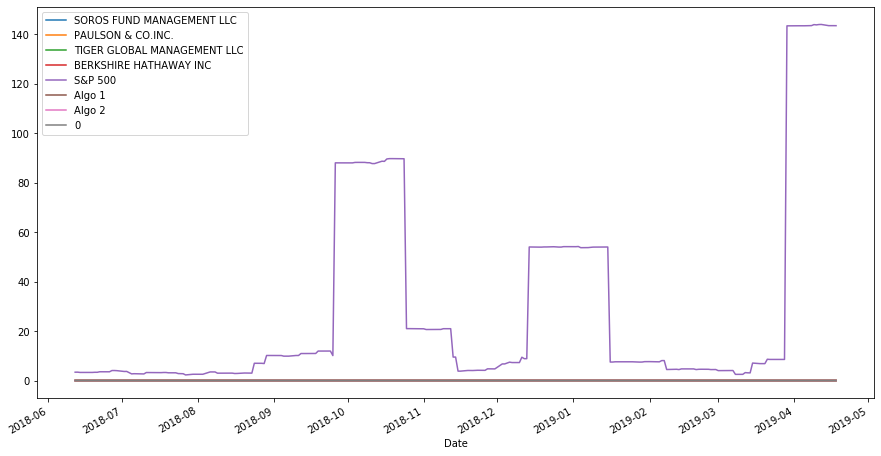

In [186]:
# Rolling
new_combined_df.rolling(window=21).std().plot(figsize=(15,8))

In [73]:
# Annualized Sharpe Ratios


In [74]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [75]:
# Create a correlation analysis
# YOUR CODE HERE

KeyError: ''

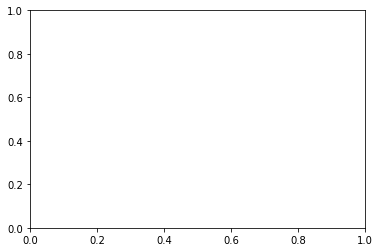

In [198]:
# Beta
corr = new_combined_df.corr()
daily_retrns = new_combined_df.pct_change()

daily_returns.plot(kind='scatter', x='S&P 500', y='')